### BERTimbau Large (aka "bert-large-portuguese-cased")

In [23]:
%pip install datasets

  Obtaining dependency information for datasets from https://files.pythonhosted.org/packages/12/17/95e48481a826f85c918e0610257de493164096e29fe16ec408c0b862e057/datasets-2.13.1-py3-none-any.whl.metadata
  Obtaining dependency information for pyarrow>=8.0.0 from https://files.pythonhosted.org/packages/13/68/1bc83fe2de87e2b785c503ef28293b56a4405d632f2b443cf00265b12d90/pyarrow-12.0.1-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
     ---------- ---------------------------- 30.7/110.5 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 110.5/110.5 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/134.3 kB ? eta -:--:--
     -------------------------------------- 134.3/134.3 kB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/319.8 kB ? eta -:--:--
     ------------------------------------ - 307.2/319.8 kB 6.3 MB/s eta 0:00:01
     --------------------------------------

In [24]:
from collections import defaultdict, Counter
import json

from matplotlib import pyplot as plt
import numpy as np
import torch


    
    
    
def print_encoding(model_inputs, indent=4):
    indent_str = " " * indent
    print("{")
    for k, v in model_inputs.items():
        print(indent_str + k + ":")
        print(indent_str + indent_str + str(v))
    print("}")

In [16]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("fill-mask", model="neuralmind/bert-large-portuguese-cased")

Some weights of the model checkpoint at neuralmind/bert-large-portuguese-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [17]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("neuralmind/bert-large-portuguese-cased")
model = AutoModelForMaskedLM.from_pretrained("neuralmind/bert-large-portuguese-cased")

Some weights of the model checkpoint at neuralmind/bert-large-portuguese-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [18]:
from transformers import AutoTokenizer  # Or BertTokenizer
from transformers import AutoModelForPreTraining  # Or BertForPreTraining for loading pretraining heads
from transformers import AutoModel  # or BertModel, for BERT without pretraining heads

model = AutoModelForPreTraining.from_pretrained('neuralmind/bert-large-portuguese-cased')
tokenizer = AutoTokenizer.from_pretrained('neuralmind/bert-large-portuguese-cased', do_lower_case=False)


In [19]:
from transformers import pipeline

pipe = pipeline('fill-mask', model=model, tokenizer=tokenizer)

pipe('Tinha uma [MASK] no meio do caminho.')


KeyError: 'logits'

In [20]:

import torch

model = AutoModel.from_pretrained('neuralmind/bert-large-portuguese-cased')
input_ids = tokenizer.encode('Tinha uma pedra no meio do caminho.', return_tensors='pt')

with torch.no_grad():
    outs = model(input_ids)
    encoded = outs[0][0, 1:-1]  # Ignore [CLS] and [SEP] special tokens




In [21]:
encoded.shape

torch.Size([8, 1024])

In [22]:
encoded

tensor([[ 1.1872,  0.5606, -0.2264,  ...,  0.0117, -0.1618, -0.2286],
        [ 1.3562,  0.1026,  0.1732,  ..., -0.3855, -0.0832, -0.1052],
        [ 0.2988,  0.2528,  0.4431,  ...,  0.2684, -0.5584,  0.6524],
        ...,
        [ 0.3405, -0.0140, -0.0748,  ...,  0.6649, -0.8983,  0.5802],
        [ 0.1011,  0.8782,  0.1545,  ..., -0.1768, -0.8880, -0.1095],
        [ 0.7912,  0.9637, -0.3859,  ...,  0.2050, -0.1350,  0.0432]])

In [ ]:
# encoded.shape: (8, 1024)
# tensor([[ 1.1872,  0.5606, -0.2264,  ...,  0.0117, -0.1618, -0.2286],
#         [ 1.3562,  0.1026,  0.1732,  ..., -0.3855, -0.0832, -0.1052],
#         [ 0.2988,  0.2528,  0.4431,  ...,  0.2684, -0.5584,  0.6524],
#         ...,
#         [ 0.3405, -0.0140, -0.0748,  ...,  0.6649, -0.8983,  0.5802],
#         [ 0.1011,  0.8782,  0.1545,  ..., -0.1768, -0.8880, -0.1095],
#         [ 0.7912,  0.9637, -0.3859,  ...,  0.2050, -0.1350,  0.0432]])

In [9]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("fill-mask", model="bert-base-multilingual-cased")

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [10]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
model = AutoModelForMaskedLM.from_pretrained("bert-base-multilingual-cased")

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [13]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model='bert-base-multilingual-cased')
unmasker("Olá eu sou dono [MASK] carro.")


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.3210406005382538,
  'token': 10104,
  'token_str': 'de',
  'sequence': 'Olá eu sou dono de carro.'},
 {'score': 0.3032969832420349,
  'token': 10149,
  'token_str': 'do',
  'sequence': 'Olá eu sou dono do carro.'},
 {'score': 0.06448573619127274,
  'token': 10168,
  'token_str': 'du',
  'sequence': 'Olá eu sou dono du carro.'},
 {'score': 0.027695348486304283,
  'token': 20514,
  'token_str': 'sou',
  'sequence': 'Olá eu sou dono sou carro.'},
 {'score': 0.023264465853571892,
  'token': 10127,
  'token_str': 'del',
  'sequence': 'Olá eu sou dono del carro.'}]

In [14]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertModel.from_pretrained("bert-base-multilingual-cased")
text = "Este restaurante é muito bom, serve uma ótima comida."
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)


In [15]:
output

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.0314, -0.0559, -0.2430,  ..., -0.1530, -0.1105,  0.0594],
         [ 0.1349, -0.5893,  0.0389,  ..., -0.2725, -0.4658,  0.2076],
         [-0.0761, -0.0893, -0.1326,  ..., -0.3147, -0.3788,  0.3401],
         ...,
         [-0.3325, -0.4347,  0.0400,  ..., -0.2487, -0.2662,  0.3430],
         [-0.1410, -0.3342, -0.0529,  ..., -0.3096, -0.4421,  0.1808],
         [ 0.0109, -0.2052,  0.0778,  ..., -0.3730, -0.3195,  0.0488]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[ 1.4295e-01, -8.1822e-02,  2.0057e-01, -7.4132e-02, -5.9847e-02,
          2.1015e-01,  9.3060e-02,  2.3379e-01, -3.8927e-01,  2.8384e-01,
          7.6587e-02, -1.5493e-01, -1.8416e-01, -1.4316e-01,  1.2352e-01,
         -1.9225e-01,  5.3808e-01, -2.7544e-02,  6.8324e-02, -3.2820e-01,
         -9.9999e-01, -1.7427e-01, -1.3732e-01, -1.5071e-03, -3.0041e-01,
         -1.8433e-02, -1.3912e-01, -7.3495e-04,  1.6721e-01, -1.208

In [6]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="papluca/xlm-roberta-base-language-detection")

In [7]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("papluca/xlm-roberta-base-language-detection")
model = AutoModelForSequenceClassification.from_pretrained("papluca/xlm-roberta-base-language-detection")

In [8]:
pipe("Este restaurante é muito bom, serve uma ótima comida")

[{'label': 'pt', 'score': 0.9934970140457153}]

In [1]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("object-detection", model="microsoft/table-transformer-detection")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
No CUDA runtime is found, using CUDA_HOME='C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.0'


In [2]:
# Load model directly
from transformers import AutoFeatureExtractor, AutoModelForObjectDetection

extractor = AutoFeatureExtractor.from_pretrained("microsoft/table-transformer-detection")
model = AutoModelForObjectDetection.from_pretrained("microsoft/table-transformer-detection")

c:\Users\danie\.conda\envs\tables-detr\lib\site-packages\transformers\models\detr\feature_extraction_detr.py:28: FutureWarning: The class DetrFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DetrImageProcessor instead.
  warnings.warn(


In [4]:
pipe = pipeline("text-classification")
pipe("This restaurant is awesome")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


[{'label': 'POSITIVE', 'score': 0.9998743534088135}]

In [5]:
pipe = pipeline("text-classification")
pipe("Este restaurante é muito bom, serve uma ótima comida")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'NEGATIVE', 'score': 0.8626155257225037}]

## Table Transformer: inference notebook

In this notebook, we are going to run the Table Transformer - which is actually a [DETR](https://arxiv.org/abs/2005.12872) model - by Microsoft Research (which is part of 🤗 Transformers) to perform table detection and table structure recognition on documents.

### Quick intro: DETR
DETR is short for DEtection TRansformer, and consists of a convolutional backbone (ResNet-50 or ResNet-101) followed by an encoder-decoder Transformer. It can be trained end-to-end to perform object detection (and panoptic segmentation, for that see my other notebooks in my repo [Transformers-tutorials](https://github.com/NielsRogge/Transformers-Tutorials)).The main contribution of DETR is its simplicity: compared to other models like Faster R-CNN and Mask R-CNN, which rely on several highly engineered things like region proposals, non-maximum suppression procedure and anchor generation, DETR is a model that can simply be trained end-to-end, and fine-tuned just like you would fine-tune BERT. This is possible due to the use of a clever loss function, the so-called **bipartite matching loss**. I highly recommend [Yannic Kilcher's video](https://www.youtube.com/watch?v=T35ba_VXkMY&t=1693s) if you want to understand how the full model works.

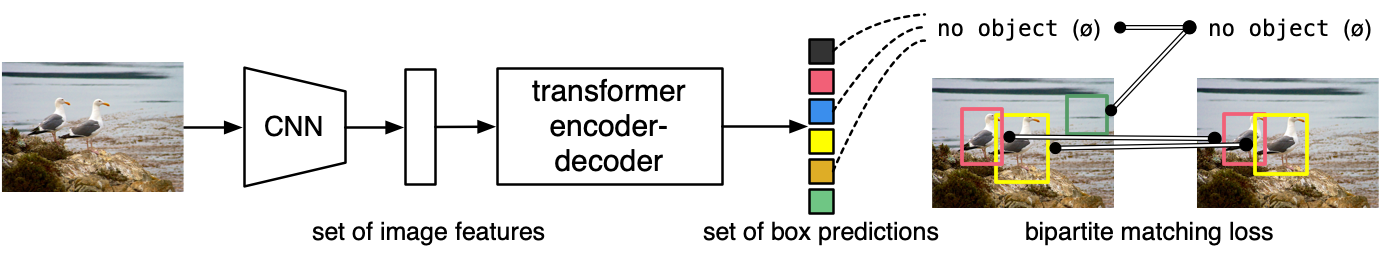

* Table Transformer paper: https://arxiv.org/abs/2110.00061
* DETR Paper: https://arxiv.org/abs/2005.12872
* DETR Blog post: https://ai.facebook.com/blog/end-to-end-object-detection-with-transformers/
* Official Github repository: https://github.com/facebookresearch/detr

My other DETR notebooks (which showcase how you can fine-tune DETR on a custom dataset, both for object detection and panoptic segmentation) can be found [here](https://github.com/NielsRogge/Transformers-Tutorials/tree/master/DETR).


In [ ]:
%pip install -q git+https://github.com/huggingface/transformers.git

In [ ]:
%pip install -q timm

## Table detection

Table detection is the task of - you guessed it - detect tables in document images, like PDFs.

Let's load a PDF and see how our model does.

In [18]:
from pathlib import Path

In [45]:
from pathlib import WindowsPath

In [25]:
p = Path('./samples/')

In [37]:
str(p)

'samples'

In [27]:
p.is_dir

<bound method Path.is_dir of WindowsPath('samples')>

In [34]:
q = p / 'do-0001.pdf'



In [35]:
q

WindowsPath('samples/do-0001.pdf')

In [38]:
str(q)

'samples\\do-0001.pdf'

In [30]:
q.resolve()

WindowsPath('C:/Users/danie/projeto-mi/table-transformer/samples/do-0001.pdf')

### testes pathlib

In [21]:
p = Path('./samples/')
[x for x in p.iterdir() if x.is_dir()]

[]

In [19]:
p = Path('.')
[x for x in p.iterdir() if x.is_dir()]

[WindowsPath('.git'),
 WindowsPath('.github'),
 WindowsPath('detr'),
 WindowsPath('docs'),
 WindowsPath('samples'),
 WindowsPath('scripts'),
 WindowsPath('src')]

In [46]:
import os
os.name

Path('./samples/do-0001.pdf')

WindowsPath('do-0001.pdf')

WindowsPath('do-0001.pdf')

In [40]:
list(p.glob('**/*.pdf'))


[WindowsPath('samples/do-0001.pdf')]

In [8]:
from pathlib import PurePath

In [12]:
from pathlib import PureWindowsPath

In [14]:
import os
p = PureWindowsPath('\samples')
os.fspath(p)

'\\samples'

In [15]:
str(p)

'\\samples'

In [16]:
p = PurePath('/etc')
str(p)

p = PureWindowsPath('c:/Program Files')
str(p)


'c:\\Program Files'

### testes image

In [52]:
# Yes!!!!!
from pdf2image import convert_from_path

PDF_file = 'do-0001.pdf'
pages = convert_from_path(PDF_file, 500,userpw='01Apr!1126')

image_counter = 1

for page in pages:
    filename = "samples/page_" + str(image_counter) + ".jpg"
    page.save(filename, 'JPEG')
    image_counter = image_counter + 1

In [53]:
from PIL import Image

In [64]:
Image_file = "samples/page_2.jpg"

In [130]:
Image_file = "samples/page_3.jpg"

In [ ]:
Image_file = "samples/page_4.jpg"

In [ ]:
Image_file = "samples/page_5.jpg"

In [139]:
Image_file = "samples/page_6.jpg"

In [ ]:
Image_file = "samples/page_7.jpg"

In [147]:
Image_file = "samples/page_8.jpg"

In [ ]:
Image_file = "samples/page_9.jpg"

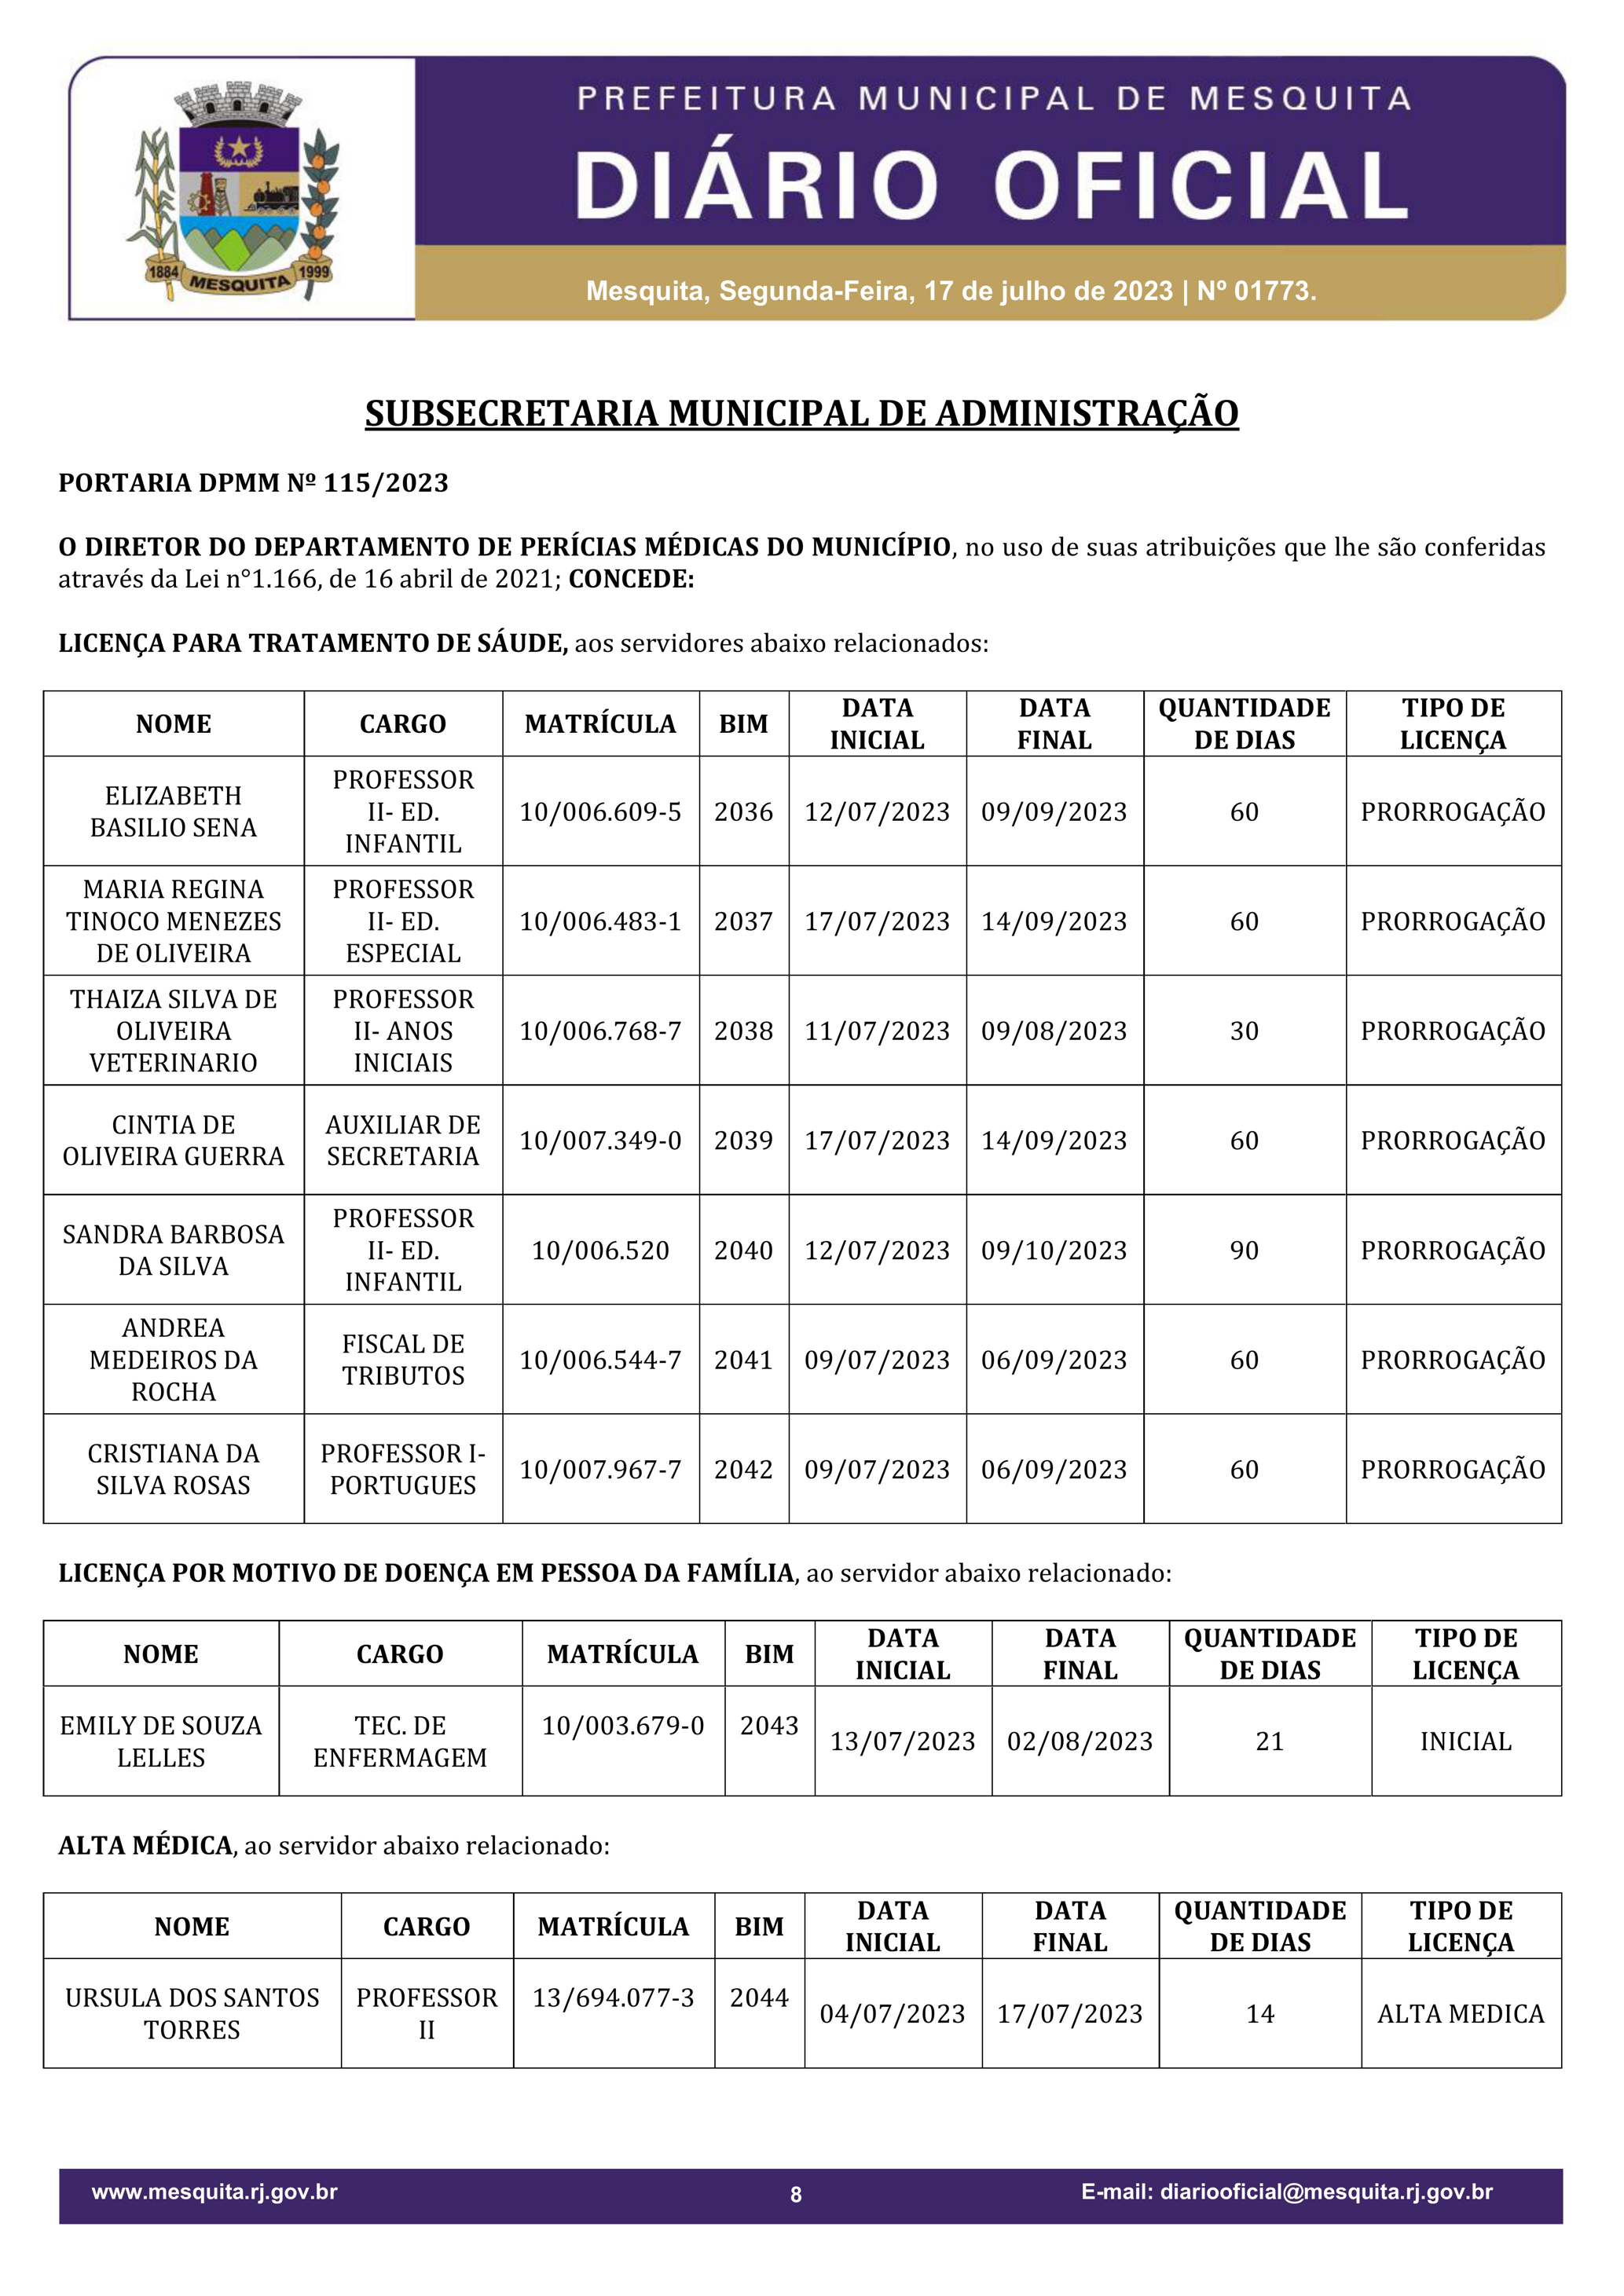

In [148]:
file_path = Image_file
image = Image.open(file_path).convert("RGB")
width, height = image.size
image.resize((int(width*0.5), int(height*0.5)))

Let's first apply the regular image preprocessing using `DetrFeatureExtractor`. The feature extractor will resize the image (minimum size = 800, max size = 1333), and normalize it across the channels using the ImageNet mean and standard deviation.

In [3]:
from transformers import DetrImageProcessor

feature_extractor = DetrImageProcessor()
encoding = feature_extractor(image, return_tensors="pt")
encoding.keys()

NameError: name 'image' is not defined

In [150]:
print(encoding['pixel_values'].shape)

torch.Size([1, 3, 1131, 800])


## Forward pass

Next, let's send the pixel values and pixel mask through the model. We first load the model from the hub, and perform a forward pass.

In [151]:
from transformers import TableTransformerForObjectDetection

model = TableTransformerForObjectDetection.from_pretrained("microsoft/table-transformer-detection")

In [152]:
import torch

with torch.no_grad():
  outputs = model(**encoding)

Let's visualize the results!

In [153]:
import matplotlib.pyplot as plt

# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

def plot_results(pil_img, scores, labels, boxes):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()
    colors = COLORS * 100
    for score, label, (xmin, ymin, xmax, ymax),c  in zip(scores.tolist(), labels.tolist(), boxes.tolist(), colors):
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=c, linewidth=3))
        text = f'{model.config.id2label[label]}: {score:0.2f}'
        ax.text(xmin, ymin, text, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()

In [154]:
# rescale bounding boxes
width, height = image.size
results = feature_extractor.post_process_object_detection(outputs, threshold=0.7, target_sizes=[(height, width)])[0]

In [82]:
results['scores']

tensor([0.9990])

In [83]:
results['labels']

tensor([0])

In [84]:
results['boxes']

tensor([[ 141.3973, 1263.2380, 1881.5811, 1883.8478]])

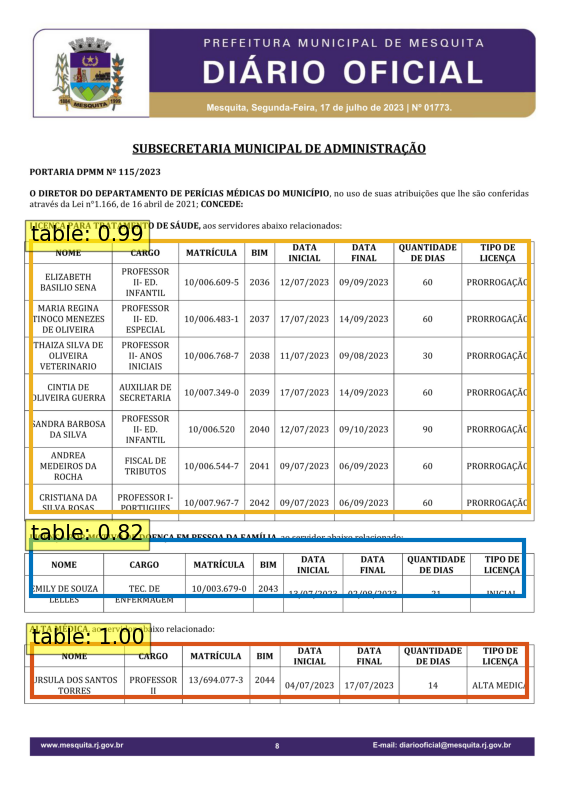

In [155]:
plot_results(image, results['scores'], results['labels'], results['boxes'])

Cool! Seems like our model has correctly identified the single table present in the PDF.

## Table structure recognition

Table structure recognition is the task of identifying the several rows, columns, cells in a table.

Let's load a demo table (which I took from the [paper](https://openaccess.thecvf.com/content/CVPR2022/html/Smock_PubTables-1M_Towards_Comprehensive_Table_Extraction_From_Unstructured_Documents_CVPR_2022_paper.html)) and see how our model does.

In [109]:
file_path = "box3.png"

In [ ]:
file_path = "box4.png"

In [156]:
file_path = "box5.png"

In [118]:
file_path = "box6.png"

In [123]:
file_path = "box7.png"

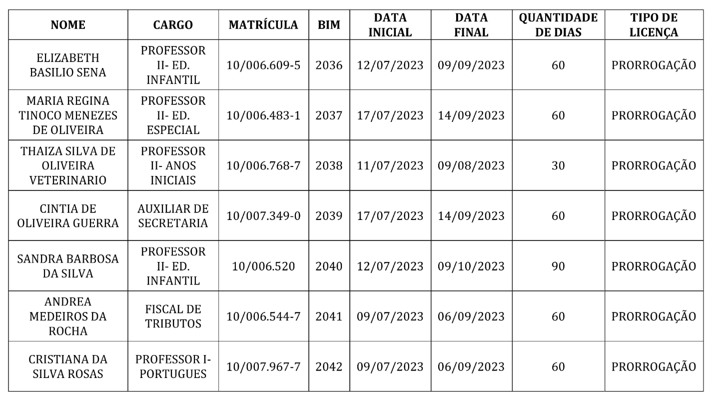

In [157]:
from huggingface_hub import hf_hub_download
from PIL import Image


image = Image.open(file_path).convert("RGB")
width, height = image.size
image.resize((int(width*0.5), int(height*0.5)))

Let's prepare the image for the model using `DetrFeatureExtractor`.

In [158]:
encoding = feature_extractor(image, return_tensors="pt")
encoding.keys()

dict_keys(['pixel_values', 'pixel_mask'])

Let's load the model from the hub, and perform a forward pass.

In [159]:
from transformers import TableTransformerForObjectDetection

model = TableTransformerForObjectDetection.from_pretrained("microsoft/table-transformer-structure-recognition")

In [161]:
with torch.no_grad():
  outputs = model(**encoding)

Let's visualize the results!

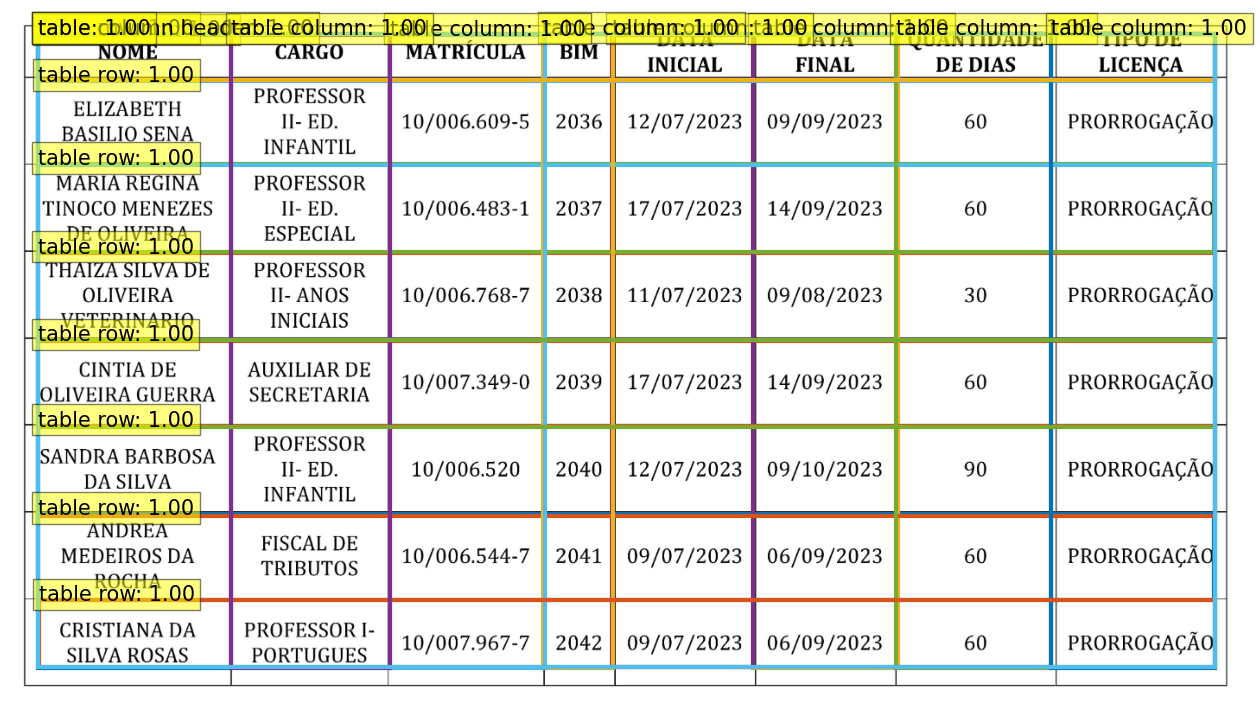

In [162]:
target_sizes = [image.size[::-1]]
results = feature_extractor.post_process_object_detection(outputs, threshold=0.6, target_sizes=target_sizes)[0]
plot_results(image, results['scores'], results['labels'], results['boxes'])

In [163]:
model.config.id2label

{0: 'table',
 1: 'table column',
 2: 'table row',
 3: 'table column header',
 4: 'table projected row header',
 5: 'table spanning cell'}

### Using Thinker

In [ ]:

from pdf2image import convert_from_path
from tkinter import *
from tkinter import messagebox
 
 
def pdf2img():
    try:
        images = convert_from_path(str(e1.get()))
        for img in images:
            img.save('new_folder\output.jpg', 'JPEG')
 
    except  :
        Result = "NO pdf found"
        messagebox.showinfo("Result", Result)
 
    else:
        Result = "success"
        messagebox.showinfo("Result", Result)
 
 
 
master = Tk()
Label(master, text="File Location").grid(row=0, sticky=W)
 
e1 = Entry(master)
e1.grid(row=0, column=1)
 
b = Button(master, text="Convert", command=pdf2img)
b.grid(row=0, column=2,columnspan=2, rowspan=2,padx=5, pady=5)
  
mainloop()